                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Wed, 12 Jun 2024   AIC                            411.302
Time:                        14:50:39   BIC                            420.634
Sample:                    01-01-1900   HQIC                           414.523
                         - 03-12-1900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

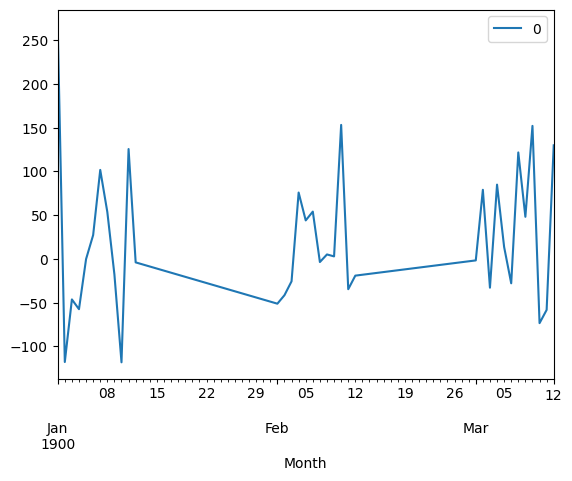

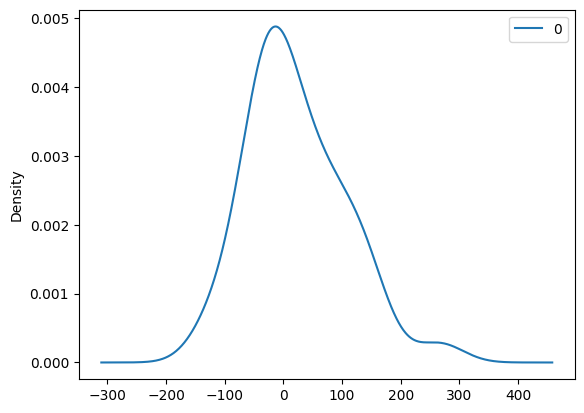

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [60]:
# 필요한 라이브러리 임포트
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 데이터를 불러올 때 날짜 형식을 명시적으로 지정
df = read_csv('./data/sales.csv', header=0, index_col=0)
df.index = to_datetime(df.index, format='%m-%d')
series = df.squeeze('columns')

# 인덱스 주기 설정(시계열 데이터의 인덱스를 일별 주기로 설정)
series.index = series.index.to_period('D')

# ARIMA 모델 적용
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# DF에 모델에 대한 오차 정보를 residuals이라는 변수에 저장
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=352.855343078677, expected=346.3
predicted=277.3980358026301, expected=329.7
predicted=368.7537341759205, expected=445.4
predicted=331.77363452375744, expected=325.9
predicted=372.0704140240519, expected=449.3
predicted=360.0208723470781, expected=411.3
predicted=454.5262299308757, expected=417.4
predicted=388.69069585100823, expected=545.5
predicted=437.6324469146788, expected=477.6
predicted=516.4376238463185, expected=687.0
predicted=520.9161907763748, expected=435.3
predicted=675.5946470385503, expected=587.3
predicted=505.201015894989, expected=676.9
Test MSE 9118.818


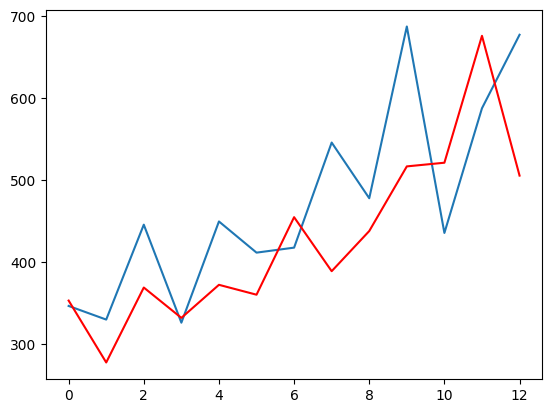

In [81]:
# statsmodels 라이브러리를 이요한 sales 데어테셋 예측
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = read_csv('./data/sales.csv', index_col=0, header=0)
df.index = to_datetime(df.index, format='%m-%d')
series = df.squeeze('columns')

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()

# 훈련 데이터 학습 -> 예측 -> 예측 값을 다시 훈련 데이터에
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    # forecast() 메서드를 사용하여 예측 수행
    output = model_fit.forecast()
    # 모델 출력 결과를 yhat에 저장
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat}, expected={obs}')

# 손실 함수로 평균 제곱 오차 사용
error = mean_squared_error(test, predictions)
print(f'Test MSE {error:.3f}')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
